In [77]:
#Dependencies and Setup

import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress
from pathlib import Path


import scipy.stats
import scipy.stats as stats

In [55]:
#CSV File to Load

train_data = Path("Resources/train.csv")

#Read the CSV File
train = pd.read_csv(train_data,delimiter = ";")

#Display the data
train.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [56]:
#Clean the Data by Making a New Dataframe with columns Age, Job, Marital, Education , Housing, Loan, Balance & last columns (Y)
train_df = train.loc[:,["age","job","marital","education","housing","loan","balance","y"]]
train_df.head()

#Drop the column name Default, Contact, Campaign,pdays, Previous,poutcome

,age,job,marital,education,housing,loan,balance,y
0,58,management,married,tertiary,yes,no,2143,no
1,44,technician,single,secondary,yes,no,29,no
2,33,entrepreneur,married,secondary,yes,yes,2,no
3,47,blue-collar,married,unknown,yes,no,1506,no
4,33,unknown,single,unknown,no,no,1,no


In [57]:
#Rename the columns name 

train_data_df = train_df.rename(columns={"age":"Age","job":"Job","marital":"Marital_Status","education":"Education",
                                         "housing":"Housing","loan":"Loan","balance":"Balance","y":"Outcome"})

train_data_df.head()

,Age,Job,Marital_Status,Education,Housing,Loan,Balance,Outcome
0,58,management,married,tertiary,yes,no,2143,no
1,44,technician,single,secondary,yes,no,29,no
2,33,entrepreneur,married,secondary,yes,yes,2,no
3,47,blue-collar,married,unknown,yes,no,1506,no
4,33,unknown,single,unknown,no,no,1,no


In [58]:
train_data_df.count()

Age               45211
Job               45211
Marital_Status    45211
Education         45211
Housing           45211
Loan              45211
Balance           45211
Outcome           45211
dtype: int64

In [59]:
# DataFrame for Outlier and Correlation
# data_df = train.loc[:,["age","job","marital","education","housing","loan","balance","duration","campaign","y"]]
# result_df = data_df.rename(columns={"age":"Age","job":"Job","marital":"Marital_Status","education":"Education",
#                                     "housing":"Housing_Loan","loan":"Loan_Personal","balance":"Yearly_Balance",
#                                     "duration":"Contact_Duration","campaign":"Number_of_Contacts","y":"Outcome"})
# result_df.tail()



In [60]:
# checking for outliers in Age,Yearly_Balance,Contact Duration,Number of Contacts

train_data_df.dtypes


Age                int64
Job               object
Marital_Status    object
Education         object
Housing           object
Loan              object
Balance            int64
Outcome           object
dtype: object

In [61]:
#Cleaning the data by removing unknown category from Job and Education column
train_data_clean=train_data_df[train_data_df['Job']!='unknown'].loc[train_data_df['Education']!='unknown']
train_data_clean.reset_index()

,index,Age,Job,Marital_Status,Education,Housing,Loan,Balance,Outcome
0,0,58,management,married,tertiary,yes,no,2143,no
1,1,44,technician,single,secondary,yes,no,29,no
2,2,33,entrepreneur,married,secondary,yes,yes,2,no
3,5,35,management,married,tertiary,yes,no,231,no
4,6,28,management,single,tertiary,yes,yes,447,no
...,...,...,...,...,...,...,...,...,...
43188,45206,51,technician,married,tertiary,no,no,825,yes
43189,45207,71,retired,divorced,primary,no,no,1729,yes
43190,45208,72,retired,married,secondary,no,no,5715,yes
43191,45209,57,blue-collar,married,secondary,no,no,668,no


In [62]:
# selecting only the data frame with outcome 'yes'
outcome_yes= train_data_df[train_data_df["Outcome"].isin(['yes'])]

outcome_yes.head()


,Age,Job,Marital_Status,Education,Housing,Loan,Balance,Outcome
83,59,admin.,married,secondary,yes,no,2343,yes
86,56,admin.,married,secondary,no,no,45,yes
87,41,technician,married,secondary,yes,no,1270,yes
129,55,services,married,secondary,yes,no,2476,yes
168,54,admin.,married,tertiary,no,no,184,yes


In [63]:
outcome_yes.count()

Age               5289
Job               5289
Marital_Status    5289
Education         5289
Housing           5289
Loan              5289
Balance           5289
Outcome           5289
dtype: int64

In [64]:
# description of the dataframe
outcome_yes.describe()

,Age,Balance
count,5289.000000,5289.000000
mean,41.670070,1804.267915
std,13.497781,3501.104777
min,18.000000,-3058.000000
25%,31.000000,210.000000
50%,38.000000,733.000000
75%,50.000000,2159.000000
max,95.000000,81204.000000


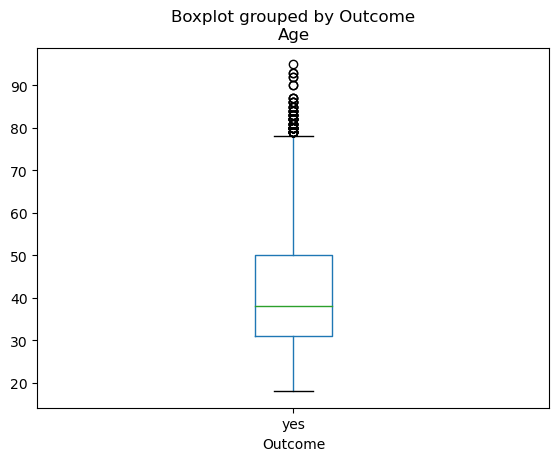

In [65]:
#generate a box plot based on age
outcome_yes.boxplot(by = 'Outcome', column=['Age'], grid = False)
plt.show()


# outcome_yes['Age'].plot(kind='box', title='Age of people saying yes')
# plt.show()



Text(46.4, 627.6899999999999, 'Mode: 32.00')

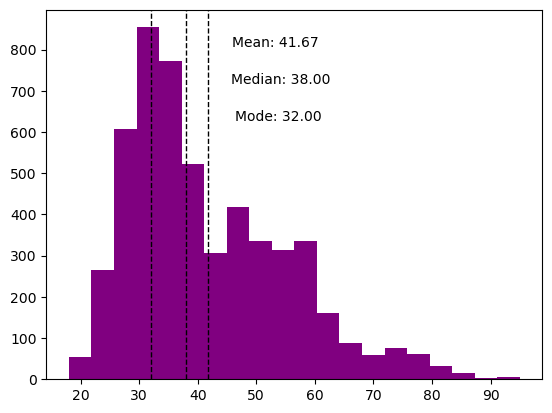

In [66]:
plt.hist(outcome_yes['Age'], bins=20,color='purple')
plt.axvline(outcome_yes['Age'].mean(), color='k', linestyle='dashed', linewidth=1)
plt.axvline(outcome_yes['Age'].median(), color='k', linestyle='dashed', linewidth=1)
plt.axvline(outcome_yes['Age'].mode().values[0], color='k', linestyle='dashed', linewidth=1)
min_ylim, max_ylim = plt.ylim()
plt.text(outcome_yes['Age'].mean()*1.1, max_ylim*0.9, 'Mean: {:.2f}'.format(outcome_yes['Age'].mean()))
plt.text(outcome_yes['Age'].median()*1.2, max_ylim*0.8, 'Median: {:.2f}'.format(outcome_yes['Age'].median()))
plt.text(outcome_yes['Age'].mode().values[0]*1.45, max_ylim*0.7, 'Mode: {:.2f}'.format(outcome_yes['Age'].mode().values[0]))

In [67]:
# remove_outlier(outcome_yes_in, Age):
q1 = outcome_yes['Age'].quantile(0.25)
q3 = outcome_yes['Age'].quantile(0.75)
iqr = q3-q1 #Interquartile range
fence_low  = q1-1.5*iqr
fence_high = q3+1.5*iqr
df_out = outcome_yes.loc[(outcome_yes['Age'] > fence_low) & (outcome_yes['Age'] < fence_high)]
print (iqr)
df_out


19.0


,Age,Job,Marital_Status,Education,Housing,Loan,Balance,Outcome
83,59,admin.,married,secondary,yes,no,2343,yes
86,56,admin.,married,secondary,no,no,45,yes
87,41,technician,married,secondary,yes,no,1270,yes
129,55,services,married,secondary,yes,no,2476,yes
168,54,admin.,married,tertiary,no,no,184,yes
...,...,...,...,...,...,...,...,...
45204,73,retired,married,secondary,no,no,2850,yes
45205,25,technician,single,secondary,no,yes,505,yes
45206,51,technician,married,tertiary,no,no,825,yes
45207,71,retired,divorced,primary,no,no,1729,yes


In [82]:
df_out.count()

Age               5224
Job               5224
Marital_Status    5224
Education         5224
Housing           5224
Loan              5224
Balance           5224
Outcome           5224
dtype: int64

The correlation between customers purchasing a term deposit and Age is PearsonRResult(statistic=0.025155017088380888, pvalue=8.825643691920774e-08)
The model details are LinregressResult(slope=0.0007613850527069466, intercept=0.08581658601129642, rvalue=0.025155017088380884, pvalue=8.825643691921747e-08, stderr=0.00014230816895744917, intercept_stderr=0.0060183551754151195)


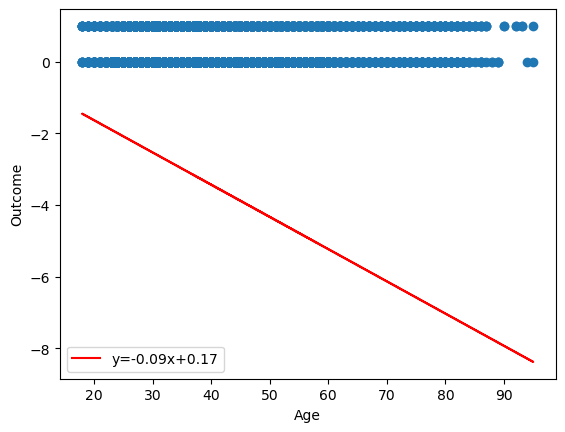

In [80]:
# Updates the values of the dataset from "yes" to 1 and from "no" to 0
train_data_df_updated = train_data_df.replace('yes',1)
train_data_df_updated2 = train_data_df_updated.replace('no',0)
train_data_df_updated2
# Calculates pearsonr and model data
corr=st.pearsonr(train_data_df_updated2['Age'],train_data_df_updated2['Outcome'])
print(f"The correlation between customers purchasing a term deposit and Age is {corr}")
model=st.linregress(train_data_df_updated2['Age'],train_data_df_updated2['Outcome'])
print(f"The model details are {model}")
# Taking the values from above output
slope = -0.090
intercept = 0.167
line = slope*(train_data_df_updated2['Age'])+intercept
# Creates the graph
plt.scatter(train_data_df_updated2['Age'],train_data_df_updated2['Outcome'])
plt.plot(train_data_df_updated2['Age'], line, 'r', label='y={:.2f}x+{:.2f}'.format(slope,intercept))
plt.xlabel('Age')
plt.ylabel('Outcome')
plt.legend()
plt.show()

In [69]:
# null hypothesis = there is no correlation between types of job and the decision to select term deposit
# alternate hypothesis= there is some correlation between the type of jpb and the descision to select the term deposit


contingency_table=pd.crosstab(train_data_df['Job'], train_data_df['Outcome'])
contingency_table

Outcome,no,yes
Job,,
admin.,4540,631
blue-collar,9024,708
entrepreneur,1364,123
housemaid,1131,109
management,8157,1301
retired,1748,516
self-employed,1392,187
services,3785,369
student,669,269


In [70]:
critical_value = stats.chi2.ppf(q = 0.95, df = 11)

In [71]:
critical_value

19.67513757268249

In [72]:
stats.chi2_contingency(contingency_table)
# https://www.pythonfordatascience.org/chi-square-test-of-independence-python/


Chi2ContingencyResult(statistic=836.1054877471965, pvalue=3.337121944935502e-172, dof=11, expected_freq=array([[4566.0715755 ,  604.9284245 ],
       [8593.5038818 , 1138.4961182 ],
       [1313.04359559,  173.95640441],
       [1094.93884232,  145.06115768],
       [8351.55771825, 1106.44228175],
       [1999.14640242,  264.85359758],
       [1394.28099356,  184.71900644],
       [3668.04512176,  485.95487824],
       [ 828.2682533 ,  109.7317467 ],
       [6708.26643958,  888.73356042],
       [1150.56879963,  152.43120037],
       [ 254.30837628,   33.69162372]]))

In [ ]:
#  in this case since p value>0.05 we can make an assumotion that there isnt enough evidence suopporting the hypothesis that jobs have effect on the purchasing of term deposit and so we will accept the null hypothesis